In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re


csv_files = glob("../data/raw/*.csv")

df = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

print(f"Combined {len(csv_files)} files into one DataFrame with {len(df)} rows.")
df.head()

Combined 6 files into one DataFrame with 2509 rows.


,description,label
0,at least 48 published,horse
1,The horse (Equus ferus caballus) is a domestic...,horse
2,It belongs to the taxonomic family Equidae and...,horse
3,The horse has evolved over the past 45 to 55 m...,horse
4,Humans began domesticating horses around 4000 ...,horse


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  2509 non-null   object
 1   label        2509 non-null   object
dtypes: object(2)
memory usage: 39.3+ KB


In [12]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

print(f"Remaining rows after dropping duplicates: {len(df)}")

Remaining rows after dropping duplicates: 2492


In [13]:
df.isnull().sum()

description    0
label          0
dtype: int64

In [14]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    filtered_words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(filtered_words)

df['description'] = df['description'].apply(clean_text)

In [15]:
df = df[df['description'].str.split().str.len() >= 5].reset_index(drop=True)
print(f"Remaining rows after removing short descriptions: {len(df)}")

Remaining rows after removing short descriptions: 2249


In [16]:
min_count = df['label'].value_counts().min()
df = df.groupby('label').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

print(df['label'].value_counts())

label
bat      351
cat      351
dog      351
horse    351
snake    351
tiger    351
Name: count, dtype: int64


/var/folders/xv/_yjrs4gd3k75bbx7y__r9lt40000gn/T/ipykernel_55332/2914912469.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('label').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


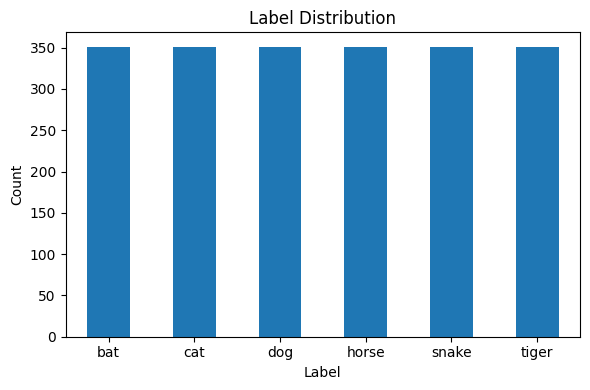

Number of samples per label:
label
bat      351
cat      351
dog      351
horse    351
snake    351
tiger    351
Name: count, dtype: int64


In [17]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar")
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()
print("Number of samples per label:")
print(label_counts)


In [18]:
# Sort to simulate training-time label_to_idx
unique_labels = sorted(df['label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

print("Label → ID mapping:", label_to_idx)
print("ID → Label mapping:", idx_to_label)

Label → ID mapping: {'bat': 0, 'cat': 1, 'dog': 2, 'horse': 3, 'snake': 4, 'tiger': 5}
ID → Label mapping: {0: 'bat', 1: 'cat', 2: 'dog', 3: 'horse', 4: 'snake', 5: 'tiger'}


In [19]:
output_path = "../data/processed/animal_dataset.csv"
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: ../data/processed/animal_dataset.csv
